# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Rosmalen, North Brabant, Netherlands**, or **Netherlands** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Rosmalen, North Brabant, Netherlands** to Ann Arbor, USA. In that case at least one source file must be about **Rosmalen, North Brabant, Netherlands**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Rosmalen, North Brabant, Netherlands** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

<IPython.core.display.Javascript object>


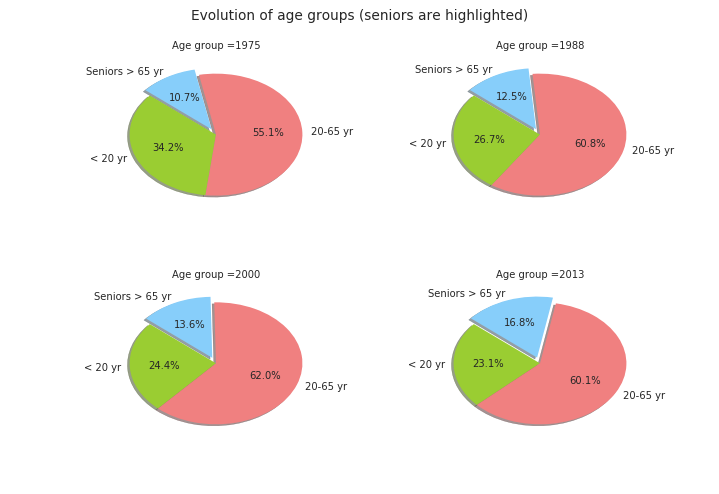

<IPython.core.display.Javascript object>


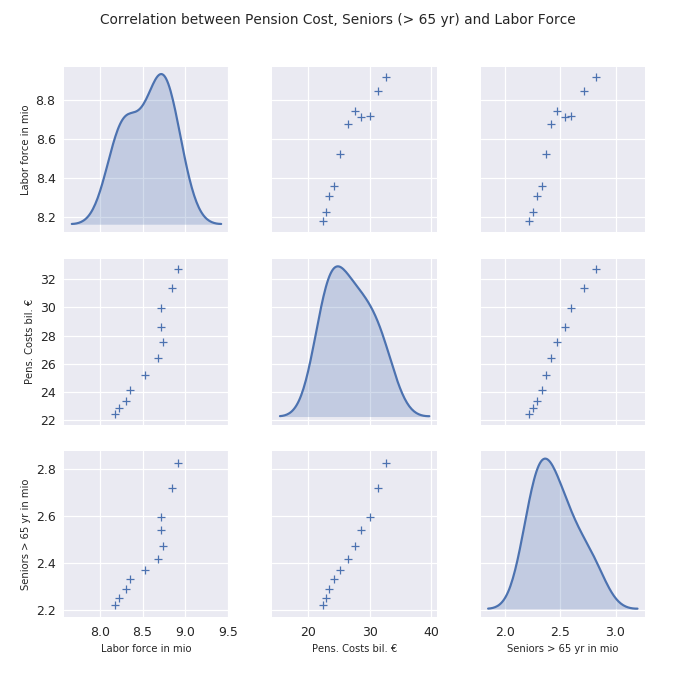

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


<IPython.core.display.Javascript object>


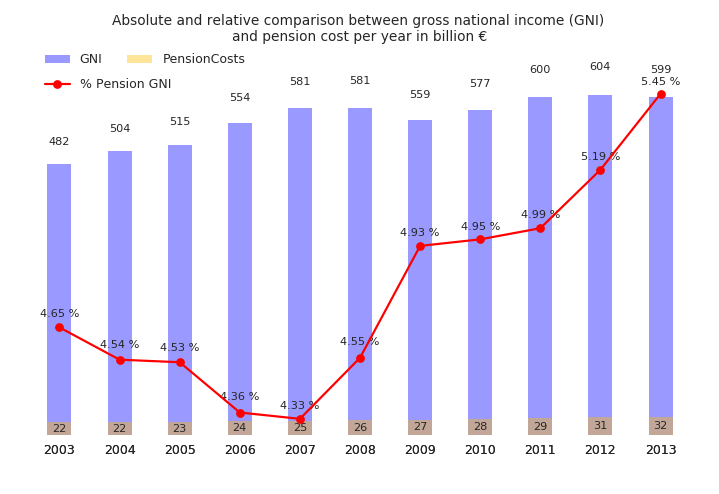

In [3]:
%matplotlib notebook
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import gridspec
import json as js 
import seaborn as sns
import sys


################################################################################
# Load dataset below
################################################################################
# change to 0 to load from a pickle file to avoid transfering from internet every time you run the code
# change to <> 0 to load from internet source the first time you run the code
load_pickle = 1 

# Load population and Gross domestic product from an internet source
# When it is loaded once you can choose to load it from a pickle (temp file of pandas)
if load_pickle==0:
    df_pop = pd.read_pickle('dutch_population.pkl') #to load dutch_population.pkl back to the dataframe df
    df_gdp = pd.read_pickle('dutch_gdp.pkl') #to load dutch_population.pkl back to the dataframe df
else:   
    #numbers about population in the Netherlands
    json_pop = pd.read_json("https://opendata.cbs.nl/ODataApi/OData/37296ned/TypedDataSet", orient="columns")
    df_pop = pd.read_json((json_pop['value']).to_json(), orient='index')
    df_pop.to_pickle('dutch_population.pkl')    #to save the dataframe, df dutch_population.pkl
    #numbers about gross domestic product in the Netherlands
    json_gdp = pd.read_json("https://opendata.cbs.nl/ODataApi/OData/81170ned/TypedDataSet", orient="columns")
    df_gdp = pd.read_json((json_gdp['value']).to_json(), orient='index')
    df_gdp.to_pickle('dutch_gdp.pkl')

    
# Clean and prepare GDP dataset
df_gdp = df_gdp[['Perioden', 'BrutoNationaalInkomen_77',
                 'BrutoBinnenlandsProduct_2', 'BrutoBeschikbaarNationaalInkomen_81', 'ProductgebondenBelastingen_202' ]]
df_gdp = df_gdp[df_gdp['Perioden'].str.contains("JJ")]    
df_gdp['Perioden'] = df_gdp['Perioden'].astype(str).str[:-4].astype(np.int64)
df_gdp = df_gdp.sort_values(by=['Perioden'])

df_gdp_grouped = df_gdp.groupby(['Perioden', 'BrutoNationaalInkomen_77',
                                 'BrutoBinnenlandsProduct_2',  
                                 'BrutoBeschikbaarNationaalInkomen_81'])['ProductgebondenBelastingen_202']

df_gdp = pd.DataFrame(df_gdp_grouped.size().reset_index(name = "Group_Count"))
df_gdp = df_gdp.rename(columns={'Perioden': 'Year', 
                                'BrutoBinnenlandsProduct_2': 'GDP',
                                'BrutoNationaalInkomen_77': 'GrossNationalIncome',
                                'BrutoBeschikbaarNationaalInkomen_81': 'GrossAvailableIncome',
                                'Group_count': 'Group_count'})
df_gdp.drop(df_gdp.columns[[-1]], axis=1, inplace=True)

# Clean and prepare population dataset 
df_pop = df_pop[['Perioden', 'TotaleBevolking_1',                 
                 'JongerDan20Jaar_10','k_20Tot40Jaar_11' ,
                 'k_40Tot65Jaar_12' , 'k_65Tot80Jaar_13',
                 'k_80JaarOfOuder_14' ]]
df_pop['Perioden'] = df_pop['Perioden'].astype(str).str[:-4].astype(np.int64)
df_pop['65AndOlder'] = df_pop['k_65Tot80Jaar_13'] + df_pop['k_80JaarOfOuder_14']
df_pop['20-65 yr'] = df_pop['k_20Tot40Jaar_11'] + df_pop['k_40Tot65Jaar_12']
df_pop = df_pop.rename(columns={'Perioden': 'Year', 
                                'TotaleBevolking_1': 'TotalPopulation',
                                'JongerDan20Jaar_10' : '< 20 yr',
                                'k_20Tot40Jaar_11' : '20-40 yr',
                                'k_40Tot65Jaar_12': '40-65 yr',
                                'k_65Tot80Jaar_13': '65To80Years',
                                'k_80JaarOfOuder_14': '80AndOlder',
                                 '65AndOlder': 'Seniors > 65 yr'})
df_pop.drop(df_pop.columns[[-3, -3]], axis=1, inplace=True)
pie_labels = ['Year', '< 20 yr', '20-65 yr', 'Seniors > 65 yr']
df_pie_chart = df_pop[pie_labels].copy()
df_pie_chart = df_pie_chart.set_index('Year')

# Dataset about labor force in the netherlands (X1000)
df_labor = pd.read_csv('labor_force.csv', delimiter=";")
df_labor =df_labor.iloc[[0,1,2, -2],7:] #keep lines 0, 1, 2 and last 2, starting from col 7
cols = [c for c in df_labor.columns if c.lower()[8:] != 'kwartaal'] #remove columns with in header
df_labor = df_labor[cols] .T

df_labor = df_labor.rename(columns={0: 'Year',
                                1: 'LaborForce',
                                2: 'Employed',
                                19: 'Unemployed'})
df_labor['Year'] = df_labor['Year'].astype('int')

# Dataset about pension costs government
df_pension = pd.read_csv('pension_exp_gov.csv', delimiter=";")
df_pension =df_pension.iloc[:,4:] #keep line 1, starting from col 7
df_pension.columns = df_pension.columns.str.replace("*", "") #if column header contains * replace with empty str
df_pension = df_pension.T# transform table
df_pension = df_pension.rename(columns={0: 'Year', 1: 'PensionCosts'}) # rename columns
df_pension =df_pension.iloc[:-2,:] #remove last 2 lines
df_pension['Year'] = df_pension['Year'].astype(np.int64) # convert column year to integer
 
# Merge dataframes above into one final dataframe
df_final_1 = pd.merge(df_gdp, df_pop, on='Year')
df_final_2 = pd.merge(df_final_1, df_labor, on='Year')
df_final = pd.merge(df_final_2, df_pension, on='Year')


# Re-calculate some figures to plot it accordingly
df_final['LaborForce_mio'] = ((df_final['LaborForce'] / 1000) )
df_final['Employed_mio'] = ((df_final['Employed'] / 1000) )
df_final['65AndOlder_mio'] = ((df_final['Seniors > 65 yr'] / 1000000) )
df_final['PensionCosts_bill'] = ((df_final['PensionCosts']  / 1000) )
df_final['% Pension GNI'] = (df_final['PensionCosts'] / df_final['GrossNationalIncome'])*100
df_final = df_final.set_index('Year')

################################################################################
# Create charts below
################################################################################
# Create piechart based on df_pop dataset for selected year
def create_piecharts(pie_ax, data, year):
    sizes = data.loc[year].values
    pie_ax.set_title('Age group ={}'.format(year), horizontalalignment='center', verticalalignment='bottom', fontsize=8)
    colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
    patches, texts, autotexts = pie_ax.pie(sizes,  explode=(0, 0, 0.1), labels=data.columns.values, colors=colors,
                                autopct='%1.1f%%', shadow=True, startangle=140)
    for i in range(3):
            texts[i].set_fontsize(8)
            autotexts[i].set_fontsize(8)   
    return pie_ax
    
fig = plt.figure()

gs = gridspec.GridSpec(2, 2,
                width_ratios=[1,1],
                height_ratios=[1,1],
                wspace=0.5, 
                hspace=0.5,
                left=0.15)
pie_age_gr_1975_ax = fig.add_subplot(gs[0,0])
pie_age_gr_1988_ax = fig.add_subplot(gs[0,1])
pie_age_gr_2000_ax = fig.add_subplot(gs[1,0])
pie_age_gr_2013_ax = fig.add_subplot(gs[1,1])

create_piecharts(pie_age_gr_1975_ax, df_pie_chart, 1975)
create_piecharts(pie_age_gr_1988_ax, df_pie_chart, 1988)
create_piecharts(pie_age_gr_2000_ax, df_pie_chart, 2000)
create_piecharts(pie_age_gr_2013_ax, df_pie_chart, 2013)
fig.suptitle('Evolution of age groups (seniors are highlighted)', fontsize=11)

################################################################################
#create second plot with scatter diagram
fig3 = sns.pairplot(df_final[['LaborForce_mio', 'PensionCosts_bill', '65AndOlder_mio']], diag_kind="kde", markers="+",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True), size=2.5);
fig3.fig.subplots_adjust(top=0.9)
fig3.fig.suptitle('Correlation between Pension Cost, Seniors (> 65 yr) and Labor Force', fontsize=11)

xlabels,ylabels = [],[]
new_labels = ['Labor force in mio', 'Pens. Costs bil. €', 'Seniors > 65 yr in mio']

for ax in fig3.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in fig3.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

    
for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        if j == 2:
            fig3.axes[j,i].xaxis.set_label_text(new_labels[i], fontsize=8)
        if i == 0:
            fig3.axes[j,i].yaxis.set_label_text(new_labels[j], fontsize=8)

################################################################################
#Create third plot with bar chart
fig2 = plt.figure() # Create matplotlib figure
ax = fig2.add_subplot(111)
bar_width = 0.4
opacity = 0.4

rects1 = ax.bar(df_final.index.values, df_final['GrossNationalIncome'], bar_width,
                alpha=opacity, color='b',
                label='GNI')

rects2 = ax.bar(df_final.index.values, df_final['PensionCosts'], bar_width,
                alpha=opacity, color='#FFBE00',                
                label='PensionCosts')

# and the first axes using subplot populated with data 
ax.set_title('Absolute and relative comparison between gross national income (GNI) \nand pension cost per year in billion €', y=1.08, fontsize=11)
ax.set_xticks(df_final.index.values )
ax.set_xticklabels(df_final.index.values)
ax.axes.get_yaxis().set_visible(False)
ax.legend(bbox_to_anchor=(0.025, 1.0, 1., .102), loc=3,  ncol=2)


for rect in rects1:
   
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height*1.08, '%d' % int(height/1000), ha='center', va='center', fontsize=9)

for rect in rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height*0.5, '%d' % int(height/1000), ha='center', va='center', fontsize=9)    
    
#add second y-value at the right to present % increase of pension costs vs GNI
ax2 = fig2.add_subplot(111, sharex=ax, frameon=False)
line = ax2.plot(df_final['% Pension GNI'], 'or-')
ax2.axes.get_yaxis().set_visible(False)
ax2.legend(bbox_to_anchor=(0.025, 0.93, 1., .102), loc=3,  ncol=2)

values = df_final['% Pension GNI'].values.copy()
values = np.around(values.astype(np.double),2)
maximum = np.amax(values) 
minimum = np.amin(values)
diff = maximum - minimum
for i, ln in enumerate(rects2):
    barheight = 575000
    height = ( ( (values[i] - minimum) / diff) + 0.09 ) * barheight 
    ax.text(ln.get_x() + ln.get_width()/2.0, height ,  '{} %'.format(values[i]) , ha='center', va='center', fontsize=9)


for item in [ax, ax2]:
    item.patch.set_visible(False)
    item.grid(False)

    fig2.tight_layout() 

fig2.show()

